In [2]:
import pandas as pd  # Veri işleme
import numpy as np  # Sayısal işlemler
import matplotlib.pyplot as plt  # Veri görselleştirme
import seaborn as sns  # İstatistiksel veri görselleştirme
import gc

In [4]:
games = pd.read_csv('games.csv')
recommendations = pd.read_csv('recommendations.csv')
users = pd.read_csv('users.csv')

In [6]:
print("games.csv başlıkları:", list(games.columns))

games.csv başlıkları: ['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'steam_deck']


In [8]:
print(games.head())

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0       0.0 

In [10]:
print("recommendations.csv başlıkları:", list(recommendations.columns))

recommendations.csv başlıkları: ['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours', 'user_id', 'review_id']


In [12]:
print(recommendations.head())

    app_id  helpful  funny        date  is_recommended  hours  user_id  \
0   975370        0      0  2022-12-12            True   36.3    51580   
1   304390        4      0  2017-02-17           False   11.5     2586   
2  1085660        2      0  2019-11-17            True  336.5   253880   
3   703080        0      0  2022-09-23            True   27.4   259432   
4   526870        0      0  2021-01-10            True    7.9    23869   

   review_id  
0          0  
1          1  
2          2  
3          3  
4          4  


In [14]:
print("users.csv başlıkları:", list(users.columns))

users.csv başlıkları: ['user_id', 'products', 'reviews']


In [16]:
print(users.head())

    user_id  products  reviews
0   7360263       359        0
1  14020781       156        1
2   8762579       329        4
3   4820647       176        4
4   5167327        98        2


In [18]:
print("\nrecommendations.csv eksik değerler:\n", recommendations.isnull().sum())


recommendations.csv eksik değerler:
 app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64


In [20]:
print("\nusers.csv eksik değerler:\n", users.isnull().sum())


users.csv eksik değerler:
 user_id     0
products    0
reviews     0
dtype: int64


In [22]:
print("games.csv eksik değerler:\n", games.isnull().sum())

games.csv eksik değerler:
 app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64


In [24]:
print("games.csv veri tipleri:\n", games.dtypes)

games.csv veri tipleri:
 app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object


In [26]:
print("\nrecommendations.csv veri tipleri:\n", recommendations.dtypes)


recommendations.csv veri tipleri:
 app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object


In [28]:
print("\nusers.csv veri tipleri:\n", users.dtypes)


users.csv veri tipleri:
 user_id     int64
products    int64
reviews     int64
dtype: object


In [30]:
# recommendations.csv'deki date sütununu datetime formatına çevir
recommendations['date'] = pd.to_datetime(recommendations['date'], errors='coerce')

# date sütunundaki hatalı dönüşümleri kontrol et (NaT olanlar)
print("Date sütununda hatalı dönüşüm (NaT) sayısı:", recommendations['date'].isnull().sum())

Date sütununda hatalı dönüşüm (NaT) sayısı: 0


In [32]:
# 1 inceleme yazan kullanıcıları belirleme
single_review_users = users[users['reviews'] == 1]['user_id']

# Bu kullanıcıları recommendations veri setinden çıkarma
filtered_recommendations = recommendations[~recommendations['user_id'].isin(single_review_users)]

# Sonuçları kontrol etme
print(f"Orijinal recommendations veri setindeki satır sayısı: {len(recommendations)}")
print(f"Filtrelenmiş recommendations veri setindeki satır sayısı: {len(filtered_recommendations)}")
print(f"Çıkarılan kullanıcı sayısı: {len(single_review_users)}")

Orijinal recommendations veri setindeki satır sayısı: 41154794
Filtrelenmiş recommendations veri setindeki satır sayısı: 33581767
Çıkarılan kullanıcı sayısı: 7573027


In [34]:
# 1. games veri setinden kriterlere uygun oyunları tespit et
excluded_games = games[
    (games['price_original'] > 20) |       # 20 dolardan pahalı oyunlar
    (games['positive_ratio'] < 75) |      # positive_ratio 75'ten düşük olan oyunlar
    (pd.to_datetime(games['date_release']).dt.year < 2000)  # 2000 yılından önce çıkan oyunlar
]

# Tespit edilen oyunların app_id'lerini al
excluded_app_ids = excluded_games['app_id']

# 2. Bu app_id'leri filtered_recommendations veri setinden çıkar
filtered_recommendations = filtered_recommendations[
    ~filtered_recommendations['app_id'].isin(excluded_app_ids)
]

# Sonuçları kontrol et
print(f"Orijinal filtered_recommendations satır sayısı: {len(recommendations)}")
print(f"Yeni filtered_recommendations satır sayısı: {len(filtered_recommendations)}")
print(f"Çıkarılan oyun sayısı: {len(excluded_app_ids)}")

Orijinal filtered_recommendations satır sayısı: 41154794
Yeni filtered_recommendations satır sayısı: 26491077
Çıkarılan oyun sayısı: 20614


In [36]:
# games veri setinde user_reviews sütununu kullanarak inceleme sayısı 50'den düşük olan oyunları bul
low_review_games = games[games['user_reviews'] < 100]

# Bu oyunların app_id'lerini al
low_review_app_ids = low_review_games['app_id']

# filtered_recommendations veri setinden bu app_id'leri çıkar
filtered_recommendations = filtered_recommendations[
    ~filtered_recommendations['app_id'].isin(low_review_app_ids)
]

print(f"50'den az inceleme yapılan oyunlar çıkarıldı.")
print(f"Kalan satır sayısı: {len(filtered_recommendations)}")

50'den az inceleme yapılan oyunlar çıkarıldı.
Kalan satır sayısı: 26212857


In [38]:
# users veri setinden 2 inceleme yapmış kullanıcıları bul
two_review_users = users[users['reviews'] == 2]

# Bu kullanıcıların user_id'lerini al
two_review_user_ids = two_review_users['user_id']

# filtered_recommendations veri setinden bu user_id'leri çıkar
filtered_recommendations = filtered_recommendations[
    ~filtered_recommendations['user_id'].isin(two_review_user_ids)
]

print(f"2 inceleme yapmış kullanıcılar çıkarıldı.")
print(f"Kalan satır sayısı: {len(filtered_recommendations)}")

2 inceleme yapmış kullanıcılar çıkarıldı.
Kalan satır sayısı: 22296064


In [40]:
# games veri setinde price_original sütununu kullanarak 3 dolardan ucuz oyunları bul
cheap_games = games[games['price_original'] < 3]

# Bu oyunların app_id'lerini al
cheap_game_app_ids = cheap_games['app_id']

# filtered_recommendations veri setinden bu app_id'leri çıkar
filtered_recommendations = filtered_recommendations[
    ~filtered_recommendations['app_id'].isin(cheap_game_app_ids)
]

# Sonuçları kontrol et
print(f"3 dolardan ucuz oyunlar çıkarıldı.")
print(f"Kalan satır sayısı: {len(filtered_recommendations)}")

3 dolardan ucuz oyunlar çıkarıldı.
Kalan satır sayısı: 7356932


In [42]:
# 1. Recommendations'da kalan kullanıcı ve oyun ID'lerini al
valid_user_ids = filtered_recommendations['user_id'].unique()
valid_game_ids = filtered_recommendations['app_id'].unique()

# 2. Games veri setini temizle (sadece valid_game_ids'deki oyunlar kalsın)
cleaned_games = games[games['app_id'].isin(valid_game_ids)]
print(f"Temizlenmiş Games Veri Seti Boyutu: {cleaned_games.shape}")

# 3. Users veri setini temizle (sadece valid_user_ids'deki kullanıcılar kalsın)
cleaned_users = users[users['user_id'].isin(valid_user_ids)]
print(f"Temizlenmiş Users Veri Seti Boyutu: {cleaned_users.shape}")

Temizlenmiş Games Veri Seti Boyutu: (6228, 13)
Temizlenmiş Users Veri Seti Boyutu: (2368365, 3)


In [44]:
# 1. Recommendations ve Users'ı user_id üzerinden birleştir
merged_users_recommendations = pd.merge(
    filtered_recommendations,
    cleaned_users,
    on='user_id',
    how='inner'
)

# 2. Yukarıdaki veri setini Games ile app_id üzerinden birleştir
merged_dataset = pd.merge(
    merged_users_recommendations,
    cleaned_games,
    on='app_id',
    how='inner'
)

# 3. Birleştirilmiş veri setinin boyutunu ve örnek bir kısmını görüntüle
print(f"Birleştirilmiş Veri Seti Boyutu: {merged_dataset.shape}")
print(merged_dataset.head())

Birleştirilmiş Veri Seti Boyutu: (7356932, 22)
    app_id  helpful  funny       date  is_recommended  hours   user_id  \
0  1766740        0      0 2022-12-18            True   12.7   6766810   
1  1766740        7      0 2022-12-26           False    2.8   7984323   
2  1766740        0      0 2022-12-13           False    3.7  13376299   
3  1766740        0      0 2022-12-10            True    2.9   5668417   
4  1766740        0      0 2022-12-09            True    3.1   5737183   

   review_id  products  reviews  ...   win    mac  linux         rating  \
0       2090       199       25  ...  True  False  False  Very Positive   
1       4283       181        7  ...  True  False  False  Very Positive   
2       6864        23        4  ...  True  False  False  Very Positive   
3       8615        58        5  ...  True  False  False  Very Positive   
4       8803       642        9  ...  True  False  False  Very Positive   

   positive_ratio user_reviews  price_final  price_origin

In [46]:
# Gereksiz sütunları kaldır
columns_to_drop = ['funny', 'helpful', 'win', 'mac', 'linux', 'price_final', 'discount', 'steam_deck']
merged_dataset = merged_dataset.drop(columns=columns_to_drop, axis=1)

# Güncel veri setinin boyutunu ve sütunlarını kontrol edin
print(f"Güncel Veri Seti Boyutu: {merged_dataset.shape}")
print(f"Kalan Sütunlar: {list(merged_dataset.columns)}")

Güncel Veri Seti Boyutu: (7356932, 14)
Kalan Sütunlar: ['app_id', 'date', 'is_recommended', 'hours', 'user_id', 'review_id', 'products', 'reviews', 'title', 'date_release', 'rating', 'positive_ratio', 'user_reviews', 'price_original']


In [48]:
# Eksik veri kontrolü
missing_data = merged_dataset.isnull().sum()

# Eksik veri içeren sütunları yazdır
print("Eksik Veriler:")
print(missing_data[missing_data > 0])

Eksik Veriler:
Series([], dtype: int64)


In [50]:
# merged_dataset'i kopyala
merged_dataset_copy = merged_dataset.copy()

In [52]:
# Veri türlerini optimize et
merged_dataset_copy['user_id'] = merged_dataset_copy['user_id'].astype('int32')
merged_dataset_copy['app_id'] = merged_dataset_copy['app_id'].astype('int32')
merged_dataset_copy['hours'] = merged_dataset_copy['hours'].astype('float32')

In [54]:
# En aktif kullanıcıları ve en çok oynanan oyunları seç
top_users = merged_dataset_copy['user_id'].value_counts().nlargest(100000).index
top_games = merged_dataset_copy['app_id'].value_counts().nlargest(1000).index

# Veri setini filtrele
reduced_dataset = merged_dataset_copy[
    (merged_dataset_copy['user_id'].isin(top_users)) &
    (merged_dataset_copy['app_id'].isin(top_games))
]

# Pivot işlemini uygula
user_game_matrix = reduced_dataset.pivot_table(
    index='user_id',
    columns='app_id',
    values='hours',
    aggfunc='sum'
).fillna(0)

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error
import random

# Kullanıcılar arası benzerlik matrisi
user_similarity = cosine_similarity(user_game_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_game_matrix.index, columns=user_game_matrix.index)

# Gerçek ve tahmin edilen oynanma sürelerini saklamak için listeler
actual_hours = []
predicted_hours = []

# Rastgele kullanıcı seçimi
random_users = random.sample(list(user_game_matrix.index), 5)  # Öneri ve tahmin için 5 kullanıcı seçiyoruz

for user in random_users:
    print(f"User ID: {user}")

    # Kullanıcının oynadığı oyunlar
    played_games = user_game_matrix.loc[user][user_game_matrix.loc[user] > 0]
    played_games_list = played_games.index.tolist()

    # Benzer kullanıcıların oynadığı oyunları bul
    similar_users = user_similarity_df[user].sort_values(ascending=False).index[1:6]
    recommended_games = []

    for similar_user in similar_users:
        similar_user_games = user_game_matrix.loc[similar_user][user_game_matrix.loc[similar_user] > 0].index.tolist()
        for game in similar_user_games:
            if game not in played_games_list and game not in recommended_games:
                recommended_games.append(game)
                if len(recommended_games) == 5:
                    break
        if len(recommended_games) == 5:
            break

    # Önerilen oyunların bilgilerini görüntüle
    recommendations = cleaned_games[cleaned_games['app_id'].isin(recommended_games)][
        ['title', 'date_release', 'rating', 'positive_ratio', 'price_original']
    ]
    print("Önerilen Oyunlar:")
    print(recommendations)
    print("\n")

    # MAE ve Accuracy için tahmin hesapla
    for game, hours in played_games.items():
        # Benzer kullanıcıların aynı oyunu oynama sürelerini al
        similar_users_hours = [
            user_game_matrix.loc[similar_user, game]
            for similar_user in similar_users
            if game in user_game_matrix.columns and user_game_matrix.loc[similar_user, game] > 0
        ]
        # Tahmin edilen süre
        predicted = sum(similar_users_hours) / len(similar_users_hours) if similar_users_hours else 0

        # Gerçek ve tahmin edilen süreleri sakla
        actual_hours.append(hours)
        predicted_hours.append(predicted)

# MAE Hesaplama
mae = mean_absolute_error(actual_hours, predicted_hours)

# Accuracy Hesaplama (%10 threshold)
threshold = 0.1
correct_predictions = sum(abs(a - p) / a <= threshold for a, p in zip(actual_hours, predicted_hours))
accuracy = correct_predictions / len(actual_hours)

print("Model Performansı:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Model Accuracy (%10 threshold): {accuracy:.2%}")

User ID: 8947881
Önerilen Oyunlar:
                                           title date_release  \
6009   Fallout: A Post Nuclear Role Playing Game   2015-11-01   
16195                              Devil Daggers   2016-02-18   
47518                              Hotline Miami   2012-10-23   
47592                                   Broforce   2015-10-15   
47869                                       DUSK   2018-12-10   

                        rating  positive_ratio  price_original  
6009             Very Positive              94            9.99  
16195  Overwhelmingly Positive              96            9.99  
47518  Overwhelmingly Positive              97            9.99  
47592  Overwhelmingly Positive              97           14.99  
47869  Overwhelmingly Positive              97           19.99  


User ID: 11865457
Önerilen Oyunlar:
                         title date_release                   rating  \
4071              Moon Hunters   2016-03-10            Very Positive   
12

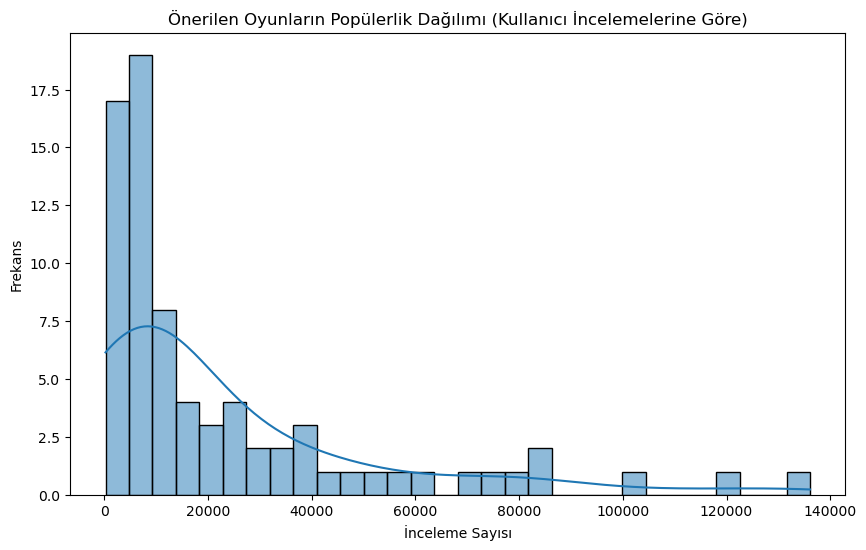

In [60]:
# Önerilen oyunların özelliklerini birleştir
recommended_game_ids = [game for user in random_users for game in user_game_matrix.loc[user].index if user_game_matrix.loc[user][game] > 0]
recommended_games = cleaned_games[cleaned_games['app_id'].isin(recommended_game_ids)]

# Oyun popülerlik dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(recommended_games['user_reviews'], bins=30, kde=True)
plt.title('Önerilen Oyunların Popülerlik Dağılımı (Kullanıcı İncelemelerine Göre)')
plt.xlabel('İnceleme Sayısı')
plt.ylabel('Frekans')
plt.show()

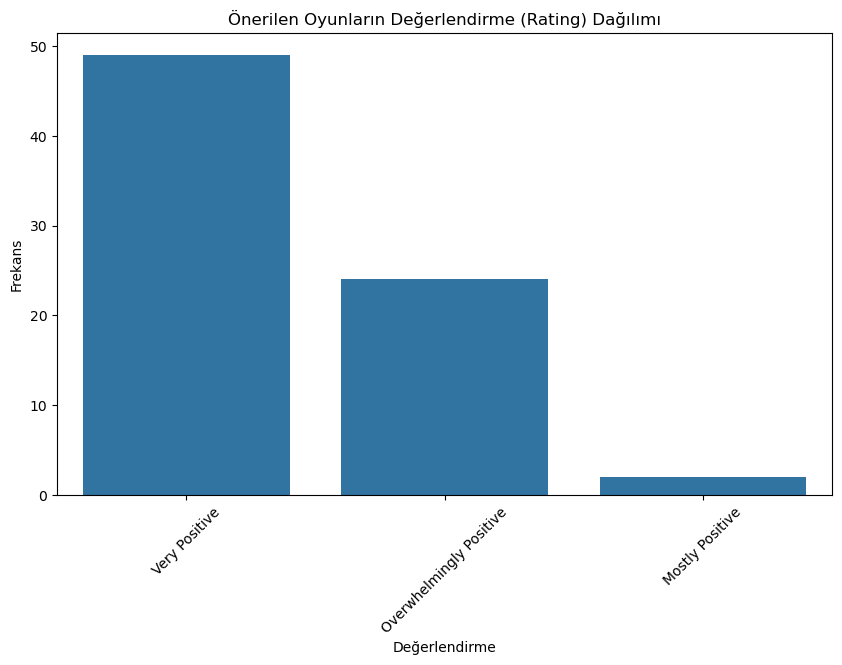

In [62]:
# Önerilen oyunların değerlendirme dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=recommended_games, x='rating', order=recommended_games['rating'].value_counts().index)
plt.title('Önerilen Oyunların Değerlendirme (Rating) Dağılımı')
plt.xlabel('Değerlendirme')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

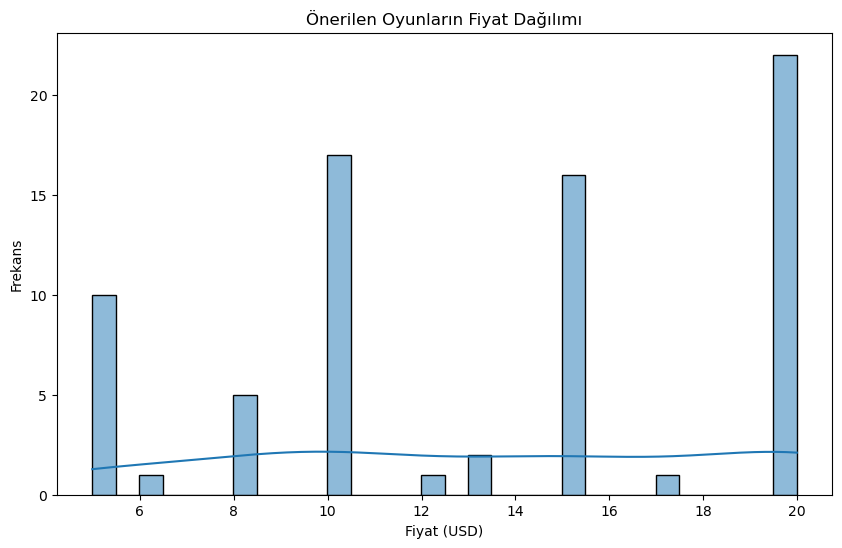

In [64]:
# Önerilen oyunların fiyat dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(recommended_games['price_original'], bins=30, kde=True)
plt.title('Önerilen Oyunların Fiyat Dağılımı')
plt.xlabel('Fiyat (USD)')
plt.ylabel('Frekans')
plt.show()